# Source code of UDatE assignment2 

# Data Preprocessing

## Import library

In [16]:
# import libraries related to numerics
import numpy as np
import scipy.stats as st
import pandas as pd
import statsmodels.api as sm

# import libraries related to graphics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
from plotnine import ggplot, aes, geom_line, geom_point, geom_smooth

## Prepare dataframe

In [6]:
# read original training dataset in csv into pandas dataframe
df_train_original = pd.read_csv("train.csv", header=0,  sep=',')
df_train_original

C:\Users\teppe\AppData\Local\Temp\ipykernel_7180\478248620.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,01/01/2013,0,0,0,0,a,1
1017205,1112,2,01/01/2013,0,0,0,0,a,1
1017206,1113,2,01/01/2013,0,0,0,0,a,1
1017207,1114,2,01/01/2013,0,0,0,0,a,1


In [8]:
# read original testing dataset in csv into pandas dataframe
df_test_original = pd.read_csv("test.csv", header=0, sep=',')
df_test_original

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...
41083,1111,6,01/08/2015,NaN,NaN,1.0,0,0,0
41084,1112,6,01/08/2015,NaN,NaN,1.0,0,0,0
41085,1113,6,01/08/2015,NaN,NaN,1.0,0,0,0
41086,1114,6,01/08/2015,NaN,NaN,1.0,0,0,0


In [10]:
# read original store dataset in csv into pandas dataframe
df_store_original = pd.read_csv("store.csv", header=0, sep=',')
df_store_original

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
# join train & test dataset to store data on unique column "Store"
train_df_merged = pd.merge(df_train_original, df_store_original, left_on='Store', right_on='Store', how='left')
test_df_merged = pd.merge(df_test_original, df_store_original, left_on='Store', right_on='Store', how='left')

In [14]:
# convert "Date" column's datatype in training data into date
train_df_merged['Date'] = pd.to_datetime(train_df_merged["Date"])

# add three attributes for time periods
train_df_merged_date =  train_df_merged
train_df_merged_date["Year"] = np.nan
train_df_merged_date["Month"] = np.nan
train_df_merged_date["Day"] = np.nan

# convert each datetime attribute into date-related datatype
for index,row in train_df_merged_date.iterrows():
    train_df_merged_date.loc[index, "Year"] = train_df_merged_date.loc[index, "Date"].year
    train_df_merged_date.loc[index, "Month"] = train_df_merged_date.loc[index, "Date"].month
    train_df_merged_date.loc[index, "Day"] = train_df_merged_date.loc[index, "Date"].day

# export the dataset into csv file for reuse
train_df_merged_date.to_csv("train_df_merged_date.csv")

C:\Users\teppe\AppData\Local\Temp\ipykernel_7180\2795325300.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.


KeyboardInterrupt: 

In [ ]:
# convert "Date" column's datatype in training data into date
test_df_merged['Date'] = pd.to_datetime(test_df_merged["Date"])

# add three attributes for time periods
test_df_merged_date = test_df_merged
test_df_merged_date["Year"] = np.nan
test_df_merged_date["Month"] = np.nan
test_df_merged_date["Day"] = np.nan

# convert each datetime attribute into date-related datatype
for index,row in test_df_merged_date.iterrows():
    test_df_merged_date.loc[index, "Year"] = test_df_merged_date.loc[index, "Date"].year
    test_df_merged_date.loc[index, "Month"] = test_df_merged_date.loc[index, "Date"].month
    test_df_merged_date.loc[index, "Day"] = test_df_merged_date.loc[index, "Date"].day

# export the dataset into csv file for reuse
test_df_merged_date.to_csv("test_df_merged_date.csv")

## Missing value imputation

In [20]:
# read exported csv files for merged data (training & testing dataset)
train_df_merged = pd.read_csv("train_df_merged_date.csv")
test_df_merged = pd.read_csv("test_df_merged_date.csv")

C:\Users\teppe\AppData\Local\Temp\ipykernel_28460\1731515201.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\teppe\AppData\Local\Temp\ipykernel_28460\1731515201.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.


In [21]:
# show datatypes of each attribute in training data
train_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Unnamed: 0                 1017209 non-null  int64  
 1   Store                      1017209 non-null  int64  
 2   DayOfWeek                  1017209 non-null  int64  
 3   Date                       1017209 non-null  object 
 4   Sales                      1017209 non-null  int64  
 5   Customers                  1017209 non-null  int64  
 6   Open                       1017209 non-null  int64  
 7   Promo                      1017209 non-null  int64  
 8   StateHoliday               1017209 non-null  object 
 9   SchoolHoliday              1017209 non-null  int64  
 10  StoreType                  1017209 non-null  object 
 11  Assortment                 1017209 non-null  object 
 12  CompetitionDistance        1014567 non-null  float64
 13  CompetitionO

In [24]:
# show datatypes of each attribute in testing data
test_df_merged.info()

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,0,1,4,2015-09-17,NaN,NaN,1.0,1,0,0,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015.0,9.0,17.0
1,1,3,4,2015-09-17,NaN,NaN,1.0,1,0,0,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015.0,9.0,17.0
2,2,7,4,2015-09-17,NaN,NaN,1.0,1,0,0,...,24000.0,4.0,2013.0,0,NaN,NaN,NaN,2015.0,9.0,17.0
3,3,8,4,2015-09-17,NaN,NaN,1.0,1,0,0,...,7520.0,10.0,2014.0,0,NaN,NaN,NaN,2015.0,9.0,17.0
4,4,9,4,2015-09-17,NaN,NaN,1.0,1,0,0,...,2030.0,8.0,2000.0,0,NaN,NaN,NaN,2015.0,9.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41083,1111,6,2015-08-01,NaN,NaN,1.0,0,0,0,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015.0,8.0,1.0
41084,41084,1112,6,2015-08-01,NaN,NaN,1.0,0,0,0,...,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2015.0,8.0,1.0
41085,41085,1113,6,2015-08-01,NaN,NaN,1.0,0,0,0,...,9260.0,NaN,NaN,0,NaN,NaN,NaN,2015.0,8.0,1.0
41086,41086,1114,6,2015-08-01,NaN,NaN,1.0,0,0,0,...,870.0,NaN,NaN,0,NaN,NaN,NaN,2015.0,8.0,1.0


In [26]:
# drop unnamed column automatically created when joining the datasets
train_df_merged = train_df_merged.drop(columns=["Unnamed: 0"])
test_df_merged = test_df_merged.drop(columns=["Unnamed: 0"])

In [28]:
# check the resulting dataset
train_df_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015.0,7.0,31.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015.0,7.0,31.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015.0,7.0,31.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015.0,7.0,31.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015.0,7.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013.0,1.0,1.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2013.0,1.0,1.0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013.0,1.0,1.0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,870.0,NaN,NaN,0,NaN,NaN,NaN,2013.0,1.0,1.0


In [29]:
# calculate CompetitionDistance's median for data imputation
median_cd_train = train_df_merged["CompetitionDistance"].median()
median_cd_test = test_df_merged["CompetitionDistance"].median()

# check median values
print("train:", median_cd_train, "test:", median_cd_test)

# create new dataframes for NaN-imputed datasets
train_df_merged_filledna = train_df_merged
test_df_merged_filledna = test_df_merged

# fill NaN values in "ompetitionDistance" in training and testing dataset with according median value
train_df_merged_filledna["CompetitionDistance"] = train_df_merged_filledna["CompetitionDistance"].fillna(train_df_merged["CompetitionDistance"].median())
test_df_merged_filledna["CompetitionDistance"] = test_df_merged_filledna["CompetitionDistance"].fillna(test_df_merged["CompetitionDistance"].median())

train: 2330.0 test: 2425.0


In [32]:
# fill NaN values in "CompetitionOpenSinceMonth/Year" in training dataset with 0
# these values are to be combined into one column presenting time span since competitor opening
train_df_merged_filledna["CompetitionOpenSinceMonth"] = train_df_merged_filledna["CompetitionOpenSinceMonth"].fillna(0)
train_df_merged_filledna["CompetitionOpenSinceYear"] = train_df_merged_filledna["CompetitionOpenSinceYear"].fillna(0)

# fill NaN values in "CompetitionOpenSinceMonth/Year" in testing dataset with 0
# these values are to be combined into one column presenting time span since competitor opening
test_df_merged_filledna["CompetitionOpenSinceMonth"] = test_df_merged_filledna["CompetitionOpenSinceMonth"].fillna(0)
test_df_merged_filledna["CompetitionOpenSinceYear"] = test_df_merged_filledna["CompetitionOpenSinceYear"].fillna(0)

In [34]:
# fill NaN values in "Promo2SinceWeek/Year" in training dataset with 0
# these values are to be combined into one column presenting time span since promo2 initiation
train_df_merged_filledna["Promo2SinceWeek"] = train_df_merged_filledna["Promo2SinceWeek"].fillna(0)
train_df_merged_filledna["Promo2SinceYear"] = train_df_merged_filledna["Promo2SinceYear"].fillna(0)

# fill NaN values in "Promo2SinceWeek/Year" in testing dataset with 0
# these values are to be combined into one column presenting time span since promo2 initiation
test_df_merged_filledna["Promo2SinceWeek"] = test_df_merged_filledna["Promo2SinceWeek"].fillna(0)
test_df_merged_filledna["Promo2SinceYear"] = test_df_merged_filledna["Promo2SinceYear"].fillna(0)

In [36]:
# combine "CompetitionOpenSinceMonth/Year" and "Promo2SinceWeek/Year" into one each column

# import datatime
from datetime import datetime

# get latest date in the dataset in datetime datatype
latest_date = datetime.strptime('2015-09-17', '%Y-%m-%d')

# define function to calculate months since competitor opening
def calculate_months_since(year, month):
    if pd.isna(year) or pd.isna(month) or year == 0 or month == 0: # convert NaN and 0 to all 0
        return 0
    year = int(float(year)) # convert time span (year) into int datatype
    month = int(float(month)) # convert time span (month) into int datatype
    open_date = datetime(year, month, 1) # get open date in datetime datetype
    return (latest_date.year - open_date.year) * 12 + (latest_date.month - open_date.month) # return months since competitor opening

# create a new column "CompetitionOpenMonth" and impute with calculated months since competitor opening
train_df_merged_filledna['CompetitionOpenMonths'] = train_df_merged_filledna.apply(lambda row: calculate_months_since(row['CompetitionOpenSinceYear'], row['CompetitionOpenSinceMonth']), axis=1)

# define function to calculate weeks since promo2 initiation
def calculate_weeks_since(year, week):
    if pd.isna(year) or pd.isna(week) or year == 0 or week == 0: # convert NaN and 0 to all 0
        return 0
    year = int(float(year)) # convert time span (year) into int datatype
    week = int(float(week)) # convert time span (week) into int datatype
    try: # catch error in date calculation and return 0 for errors
        open_date = datetime.strptime(f'{year}-W{week}-1', '%Y-W%W-%w')
    except ValueError:
        return 0
    return (latest_date - open_date).days // 7 # return weeks since promo2 initiation

# create a new column "Promo2SinceWeeks" and impute with calculated weeks since promo2 initiation
train_df_merged_filledna['Promo2SinceWeeks'] = train_df_merged_filledna.apply(lambda row: calculate_weeks_since(row['Promo2SinceYear'], row['Promo2SinceWeek']), axis=1)

In [37]:
# check resulting training data
train_df_merged_filledna

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,CompetitionOpenMonths,Promo2SinceWeeks
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,0.0,0.0,NaN,2015.0,7.0,31.0,84,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015.0,7.0,31.0,94,285
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015.0,7.0,31.0,105,232
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,0.0,0.0,NaN,2015.0,7.0,31.0,72,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,0.0,0.0,NaN,2015.0,7.0,31.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013.0,1.0,1.0,15,110
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,2006.0,0,0.0,0.0,NaN,2013.0,1.0,1.0,113,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,0.0,0,0.0,0.0,NaN,2013.0,1.0,1.0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,0.0,0,0.0,0.0,NaN,2013.0,1.0,1.0,0,0


In [38]:
# drop competition-related columns used for "CompetitionOpenMonths" in both datasets
train_df_merged_filledna = train_df_merged_filledna.drop(columns=["CompetitionOpenSinceYear"])
train_df_merged_filledna = train_df_merged_filledna.drop(columns=["CompetitionOpenSinceMonth"])
test_df_merged_filledna = test_df_merged_filledna.drop(columns=["CompetitionOpenSinceYear"])
test_df_merged_filledna = test_df_merged_filledna.drop(columns=["CompetitionOpenSinceMonth"])

In [39]:
# drop promo2-related columns used for "Promo2SinceWeeks"
train_df_merged_filledna = train_df_merged_filledna.drop(columns=["Promo2SinceWeek"])
train_df_merged_filledna = train_df_merged_filledna.drop(columns=["Promo2SinceYear"])
test_df_merged_filledna = test_df_merged_filledna.drop(columns=["Promo2SinceWeek"])
test_df_merged_filledna = test_df_merged_filledna.drop(columns=["Promo2SinceYear"])

In [40]:
# check resulting training data
train_df_merged_filledna

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Year,Month,Day,CompetitionOpenMonths,Promo2SinceWeeks
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,NaN,2015.0,7.0,31.0,84,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,"Jan,Apr,Jul,Oct",2015.0,7.0,31.0,94,285
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1,"Jan,Apr,Jul,Oct",2015.0,7.0,31.0,105,232
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0,NaN,2015.0,7.0,31.0,72,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0,NaN,2015.0,7.0,31.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,1,"Jan,Apr,Jul,Oct",2013.0,1.0,1.0,15,110
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,0,NaN,2013.0,1.0,1.0,113,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0,NaN,2013.0,1.0,1.0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0,NaN,2013.0,1.0,1.0,0,0


In [41]:
# create a dataframe containing all months
all_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]

# create 12 columns for each month and split "PromoInterval" value into those columns in training data
for month in all_months:
    train_df_merged_filledna[month] = train_df_merged_filledna["PromoInterval"].apply(
        lambda x: 1 if isinstance(x, str) and month in x.split(',') else 0
    )

# drop "PromoInterval" column in training data
train_df_merged_filledna = train_df_merged_filledna.drop(columns=["PromoInterval"])

# create 12 columns for each month and split "PromoInterval" value into those columns in testing data
for month in all_months:
    test_df_merged_filledna[month] = test_df_merged_filledna["PromoInterval"].apply(
        lambda x: 1 if isinstance(x, str) and month in x.split(',') else 0
    )

# drop "PromoInterval" column in testing data
test_df_merged_filledna = test_df_merged_filledna.drop(columns=["PromoInterval"])

In [42]:
# show datatype information of the resulting data
train_df_merged_filledna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Store                  1017209 non-null  int64  
 1   DayOfWeek              1017209 non-null  int64  
 2   Date                   1017209 non-null  object 
 3   Sales                  1017209 non-null  int64  
 4   Customers              1017209 non-null  int64  
 5   Open                   1017209 non-null  int64  
 6   Promo                  1017209 non-null  int64  
 7   StateHoliday           1017209 non-null  object 
 8   SchoolHoliday          1017209 non-null  int64  
 9   StoreType              1017209 non-null  object 
 10  Assortment             1017209 non-null  object 
 11  CompetitionDistance    1017209 non-null  float64
 12  Promo2                 1017209 non-null  int64  
 13  Year                   1017209 non-null  float64
 14  Month             

## Datatype conversion

In [44]:
# below process for training data
# define columns to convert datatype 
columns_to_convert = ["Customers",
                      "DayOfWeek", 
                      "StateHoliday", 
                      "StoreType", 
                      "Assortment"]

# convert data in columns_to_convert to string
for column in columns_to_convert:
    train_df_merged_filledna[column] = train_df_merged_filledna[column].astype(str)

# convert month columns' datatype to string
for month in all_months:
    train_df_merged_filledna[month] = train_df_merged_filledna[month].astype(str)

# convert Year, Month, Day into integer type
train_df_merged_filledna["Year"] = train_df_merged_filledna["Year"].astype(int)
train_df_merged_filledna["Month"] = train_df_merged_filledna["Month"].astype(int)
train_df_merged_filledna["Day"] = train_df_merged_filledna["Day"].astype(int)

# below process for testing data
# convert data in columns_to_convert to string
for column in columns_to_convert:
    test_df_merged_filledna[column] = test_df_merged_filledna[column].astype(str)

# convert month columns' datatype to string
for month in all_months:
    test_df_merged_filledna[month] = test_df_merged_filledna[month].astype(str)

# convert Year, Month, Day into integer type
test_df_merged_filledna["Year"] = test_df_merged_filledna["Year"].astype(int)
test_df_merged_filledna["Month"] = test_df_merged_filledna["Month"].astype(int)
test_df_merged_filledna["Day"] = test_df_merged_filledna["Day"].astype(int)

In [45]:
# drop date coloumns in both datasets
train_df_merged_filledna = train_df_merged_filledna.drop(columns=["Date"])
test_df_merged_filledna = test_df_merged_filledna.drop(columns=["Date"])

In [46]:
# show resulting data info (train)
train_df_merged_filledna.info()
train_df_merged_filledna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 29 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Store                  1017209 non-null  int64  
 1   DayOfWeek              1017209 non-null  object 
 2   Sales                  1017209 non-null  int64  
 3   Customers              1017209 non-null  object 
 4   Open                   1017209 non-null  int64  
 5   Promo                  1017209 non-null  int64  
 6   StateHoliday           1017209 non-null  object 
 7   SchoolHoliday          1017209 non-null  int64  
 8   StoreType              1017209 non-null  object 
 9   Assortment             1017209 non-null  object 
 10  CompetitionDistance    1017209 non-null  float64
 11  Promo2                 1017209 non-null  int64  
 12  Year                   1017209 non-null  int32  
 13  Month                  1017209 non-null  int32  
 14  Day               

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
0,1,5,5263,555,1,1,0,1,c,a,...,0,0,0,0,0,0,0,0,0,0
1,2,5,6064,625,1,1,0,1,a,a,...,0,1,0,0,1,0,0,1,0,0
2,3,5,8314,821,1,1,0,1,a,a,...,0,1,0,0,1,0,0,1,0,0
3,4,5,13995,1498,1,1,0,1,c,c,...,0,0,0,0,0,0,0,0,0,0
4,5,5,4822,559,1,1,0,1,a,a,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,a,1,a,a,...,0,1,0,0,1,0,0,1,0,0
1017205,1112,2,0,0,0,0,a,1,c,c,...,0,0,0,0,0,0,0,0,0,0
1017206,1113,2,0,0,0,0,a,1,a,c,...,0,0,0,0,0,0,0,0,0,0
1017207,1114,2,0,0,0,0,a,1,a,c,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# show resulting data info (test)
test_df_merged_filledna.info()
test_df_merged_filledna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                41088 non-null  int64  
 1   DayOfWeek            41088 non-null  object 
 2   Sales                0 non-null      float64
 3   Customers            41088 non-null  object 
 4   Open                 41077 non-null  float64
 5   Promo                41088 non-null  int64  
 6   StateHoliday         41088 non-null  object 
 7   SchoolHoliday        41088 non-null  int64  
 8   StoreType            41088 non-null  object 
 9   Assortment           41088 non-null  object 
 10  CompetitionDistance  41088 non-null  float64
 11  Promo2               41088 non-null  int64  
 12  Year                 41088 non-null  int32  
 13  Month                41088 non-null  int32  
 14  Day                  41088 non-null  int32  
 15  Jan                  41088 non-null 

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
0,1,4,NaN,nan,1.0,1,0,0,c,a,...,0,0,0,0,0,0,0,0,0,0
1,3,4,NaN,nan,1.0,1,0,0,a,a,...,0,1,0,0,1,0,0,1,0,0
2,7,4,NaN,nan,1.0,1,0,0,a,c,...,0,0,0,0,0,0,0,0,0,0
3,8,4,NaN,nan,1.0,1,0,0,a,a,...,0,0,0,0,0,0,0,0,0,0
4,9,4,NaN,nan,1.0,1,0,0,a,c,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,NaN,nan,1.0,0,0,0,a,a,...,0,1,0,0,1,0,0,1,0,0
41084,1112,6,NaN,nan,1.0,0,0,0,c,c,...,0,0,0,0,0,0,0,0,0,0
41085,1113,6,NaN,nan,1.0,0,0,0,a,c,...,0,0,0,0,0,0,0,0,0,0
41086,1114,6,NaN,nan,1.0,0,0,0,a,c,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Get basic stats of training data
train_df_merged_filledna.describe()

,Store,Sales,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,Day,CompetitionOpenMonths,Promo2SinceWeeks
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.773819e+03,8.301067e-01,3.815145e-01,1.786467e-01,5.422034e+03,5.005638e-01,2.013832e+03,5.846762e+00,1.570279e+01,5.286066e+01,9.170077e+01
std,3.219087e+02,3.849926e+03,3.755392e-01,4.857586e-01,3.830564e-01,7.706913e+03,4.999999e-01,7.773960e-01,3.326097e+00,8.787638e+00,6.940862e+01,1.094031e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,3.727000e+03,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,5.744000e+03,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,1.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,3.400000e+01,1.400000e+01
75%,8.380000e+02,7.856000e+03,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,1.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,9.000000e+01,1.930000e+02
max,1.115000e+03,4.155100e+04,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,1.388000e+03,3.190000e+02


## Data reduction

In [49]:
# drop store column (redundant identifier for regression) in both datasets
train_df_merged_filledna = train_df_merged_filledna.drop(columns=["Store"])
test_df_merged_filledna = test_df_merged_filledna.drop(columns=["Store"])

In [50]:
# check resulting training dataset
train_df_merged_filledna

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
0,5,5263,555,1,1,0,1,c,a,1270.0,...,0,0,0,0,0,0,0,0,0,0
1,5,6064,625,1,1,0,1,a,a,570.0,...,0,1,0,0,1,0,0,1,0,0
2,5,8314,821,1,1,0,1,a,a,14130.0,...,0,1,0,0,1,0,0,1,0,0
3,5,13995,1498,1,1,0,1,c,c,620.0,...,0,0,0,0,0,0,0,0,0,0
4,5,4822,559,1,1,0,1,a,a,29910.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,0,a,1,a,a,1900.0,...,0,1,0,0,1,0,0,1,0,0
1017205,2,0,0,0,0,a,1,c,c,1880.0,...,0,0,0,0,0,0,0,0,0,0
1017206,2,0,0,0,0,a,1,a,c,9260.0,...,0,0,0,0,0,0,0,0,0,0
1017207,2,0,0,0,0,a,1,a,c,870.0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# check resulting testing dataset
test_df_merged_filledna

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
0,4,NaN,nan,1.0,1,0,0,c,a,1270.0,...,0,0,0,0,0,0,0,0,0,0
1,4,NaN,nan,1.0,1,0,0,a,a,14130.0,...,0,1,0,0,1,0,0,1,0,0
2,4,NaN,nan,1.0,1,0,0,a,c,24000.0,...,0,0,0,0,0,0,0,0,0,0
3,4,NaN,nan,1.0,1,0,0,a,a,7520.0,...,0,0,0,0,0,0,0,0,0,0
4,4,NaN,nan,1.0,1,0,0,a,c,2030.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,6,NaN,nan,1.0,0,0,0,a,a,1900.0,...,0,1,0,0,1,0,0,1,0,0
41084,6,NaN,nan,1.0,0,0,0,c,c,1880.0,...,0,0,0,0,0,0,0,0,0,0
41085,6,NaN,nan,1.0,0,0,0,a,c,9260.0,...,0,0,0,0,0,0,0,0,0,0
41086,6,NaN,nan,1.0,0,0,0,a,c,870.0,...,0,0,0,0,0,0,0,0,0,0


## EDA

C:\Users\teppe\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


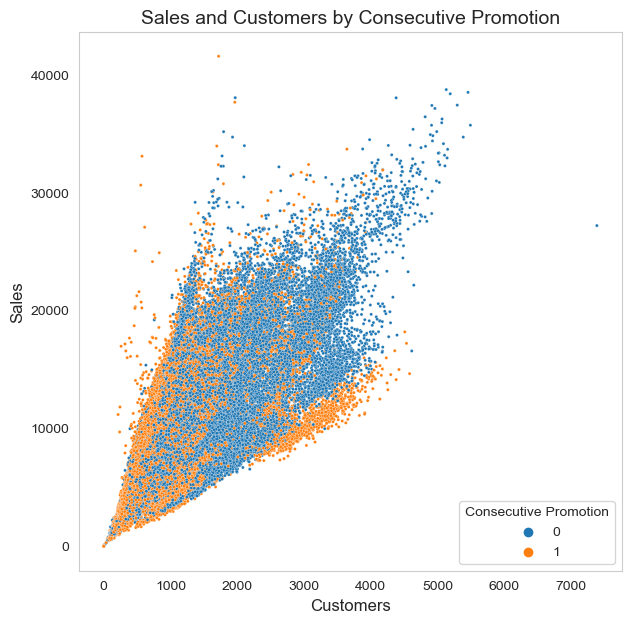

In [48]:
# import seaborn library for visualization
import seaborn as sb

# create a scateter plot of Sales and Customers categorized by Consecutive Promotion Status
fig, ax = plt.subplots(figsize=(7, 7))
scatter = sb.scatterplot(ax=ax, x='Customers', y='Sales', data=train_df_merged_filledna, hue='Promo2', s=5)
ax.set_xlabel("Customers", size=12)
ax.set_ylabel("Sales", size=12)
ax.set_title("Sales and Customers by Consecutive Promotion", size=14)
handles, labels = scatter.get_legend_handles_labels()
ax.legend(handles=handles, title='Consecutive Promotion')
plt.show()

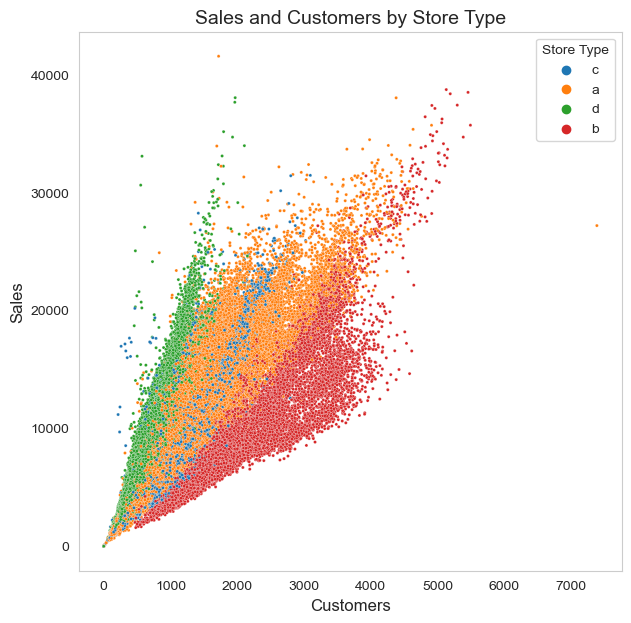

In [50]:
# create a scateter plot of Sales and Customers categorized by Store Type
fig, ax = plt.subplots(figsize=(7, 7))
scatter = sb.scatterplot(ax=ax, x='Customers', y='Sales', data=train_df_merged_filledna, hue='StoreType', s=5)
ax.set_xlabel("Customers", size=12)
ax.set_ylabel("Sales", size=12)
ax.set_title("Sales and Customers by Store Type", size=14)
handles, labels = scatter.get_legend_handles_labels()
ax.legend(handles=handles, title='Store Type')
plt.show()

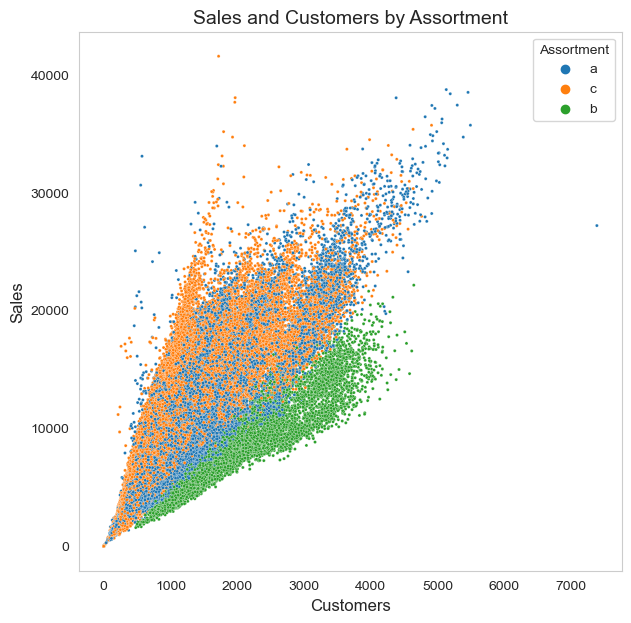

In [51]:
# create a scateter plot of Sales and Customers categorized by Assortment
fig, ax = plt.subplots(figsize=(7, 7))
scatter = sb.scatterplot(ax=ax, x='Customers', y='Sales', data=train_df_merged_filledna, hue='Assortment', s=5)
ax.set_xlabel("Customers", size=12)
ax.set_ylabel("Sales", size=12)
ax.set_title("Sales and Customers by Assortment", size=14)
handles, labels = scatter.get_legend_handles_labels()
ax.legend(handles=handles, title='Assortment')
plt.show()

C:\Users\teppe\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


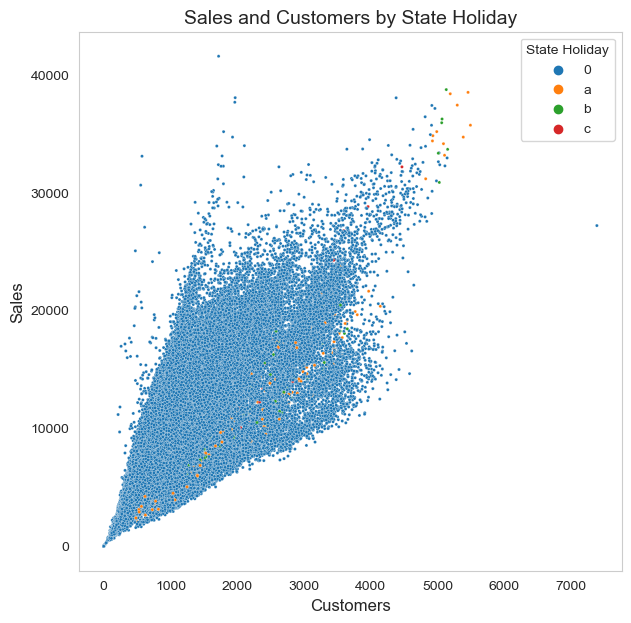

In [52]:
# create a scateter plot of Sales and Customers categorized by State Holiday
fig, ax = plt.subplots(figsize=(7, 7))
scatter = sb.scatterplot(ax=ax, x='Customers', y='Sales', data=train_df_merged_filledna, hue='StateHoliday', s=5)
ax.set_xlabel("Customers", size=12)
ax.set_ylabel("Sales", size=12)
ax.set_title("Sales and Customers by State Holiday", size=14)
handles, labels = scatter.get_legend_handles_labels()
ax.legend(handles=handles, title='State Holiday')
plt.show()

## Get dummies

In [52]:
# convert Customers datatype into integer
train_df_merged_filledna["Customers"] = train_df_merged_filledna["Customers"].astype(int)

In [53]:
# check datatypes in training dataset
train_df_merged_filledna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DayOfWeek              1017209 non-null  object 
 1   Sales                  1017209 non-null  int64  
 2   Customers              1017209 non-null  int32  
 3   Open                   1017209 non-null  int64  
 4   Promo                  1017209 non-null  int64  
 5   StateHoliday           1017209 non-null  object 
 6   SchoolHoliday          1017209 non-null  int64  
 7   StoreType              1017209 non-null  object 
 8   Assortment             1017209 non-null  object 
 9   CompetitionDistance    1017209 non-null  float64
 10  Promo2                 1017209 non-null  int64  
 11  Year                   1017209 non-null  int32  
 12  Month                  1017209 non-null  int32  
 13  Day                    1017209 non-null  int32  
 14  CompetitionOpenMon

In [54]:
# ensure NaN values are replaced with the median
median_customers = train_df_merged_filledna["Customers"].median()
test_df_merged_filledna["Customers"] = test_df_merged_filledna["Customers"].fillna(float(median_customers))

# confirm no NaN values remain
print("Remaining NaN values:", test_df_merged_filledna["Customers"].isnull().sum())

# convert column to numeric (force any non-numeric values to NaN)
test_df_merged_filledna["Customers"] = pd.to_numeric(test_df_merged_filledna["Customers"], errors='coerce')

# replace any new NaN values (if present)
test_df_merged_filledna["Customers"].fillna(float(median_customers), inplace=True)

# convert to integer type
test_df_merged_filledna["Customers"] = test_df_merged_filledna["Customers"].astype(int)

test_df_merged_filledna["Customers"]

Remaining NaN values: 0


0        609
1        609
2        609
3        609
4        609
        ... 
41083    609
41084    609
41085    609
41086    609
41087    609
Name: Customers, Length: 41088, dtype: int32

In [55]:
# check resulting testing dataset
test_df_merged_filledna

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
0,4,NaN,609,1.0,1,0,0,c,a,1270.0,...,0,0,0,0,0,0,0,0,0,0
1,4,NaN,609,1.0,1,0,0,a,a,14130.0,...,0,1,0,0,1,0,0,1,0,0
2,4,NaN,609,1.0,1,0,0,a,c,24000.0,...,0,0,0,0,0,0,0,0,0,0
3,4,NaN,609,1.0,1,0,0,a,a,7520.0,...,0,0,0,0,0,0,0,0,0,0
4,4,NaN,609,1.0,1,0,0,a,c,2030.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,6,NaN,609,1.0,0,0,0,a,a,1900.0,...,0,1,0,0,1,0,0,1,0,0
41084,6,NaN,609,1.0,0,0,0,c,c,1880.0,...,0,0,0,0,0,0,0,0,0,0
41085,6,NaN,609,1.0,0,0,0,a,c,9260.0,...,0,0,0,0,0,0,0,0,0,0
41086,6,NaN,609,1.0,0,0,0,a,c,870.0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# encode dummies in training data
train_df_merged_dummies = pd.get_dummies(train_df_merged_filledna, drop_first=True)

In [57]:
# check resulting training data
train_df_merged_dummies

,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,Day,...,Mar_1,Apr_1,May_1,Jun_1,Jul_1,Aug_1,Sept_1,Oct_1,Nov_1,Dec_1
0,5263,555,1,1,1,1270.0,0,2015,7,31,...,False,False,False,False,False,False,False,False,False,False
1,6064,625,1,1,1,570.0,1,2015,7,31,...,False,True,False,False,True,False,False,True,False,False
2,8314,821,1,1,1,14130.0,1,2015,7,31,...,False,True,False,False,True,False,False,True,False,False
3,13995,1498,1,1,1,620.0,0,2015,7,31,...,False,False,False,False,False,False,False,False,False,False
4,4822,559,1,1,1,29910.0,0,2015,7,31,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,0,0,0,0,1,1900.0,1,2013,1,1,...,False,True,False,False,True,False,False,True,False,False
1017205,0,0,0,0,1,1880.0,0,2013,1,1,...,False,False,False,False,False,False,False,False,False,False
1017206,0,0,0,0,1,9260.0,0,2013,1,1,...,False,False,False,False,False,False,False,False,False,False
1017207,0,0,0,0,1,870.0,0,2013,1,1,...,False,False,False,False,False,False,False,False,False,False


In [58]:
# encode dummies in training data
test_df_merged_dummies = pd.get_dummies(test_df_merged_filledna, drop_first=True)

In [59]:
# check resulting testing data

,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,Day,...,Mar_1,Apr_1,May_1,Jun_1,Jul_1,Aug_1,Sept_1,Oct_1,Nov_1,Dec_1
0,NaN,609,1.0,1,0,1270.0,0,2015,9,17,...,False,False,False,False,False,False,False,False,False,False
1,NaN,609,1.0,1,0,14130.0,1,2015,9,17,...,False,True,False,False,True,False,False,True,False,False
2,NaN,609,1.0,1,0,24000.0,0,2015,9,17,...,False,False,False,False,False,False,False,False,False,False
3,NaN,609,1.0,1,0,7520.0,0,2015,9,17,...,False,False,False,False,False,False,False,False,False,False
4,NaN,609,1.0,1,0,2030.0,0,2015,9,17,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,NaN,609,1.0,0,0,1900.0,1,2015,8,1,...,False,True,False,False,True,False,False,True,False,False
41084,NaN,609,1.0,0,0,1880.0,0,2015,8,1,...,False,False,False,False,False,False,False,False,False,False
41085,NaN,609,1.0,0,0,9260.0,0,2015,8,1,...,False,False,False,False,False,False,False,False,False,False
41086,NaN,609,1.0,0,0,870.0,0,2015,8,1,...,False,False,False,False,False,False,False,False,False,False


In [60]:
# fill missing columns in testing dataset according to training dataset
for column in train_df_merged_dummies.columns:
    if column not in test_df_merged_dummies.columns:
        test_df_merged_dummies[column] = False

test_df_merged_dummies = test_df_merged_dummies[train_df_merged_dummies.columns]

print("Updated test_df_merged_dummies columns:")
print(test_df_merged_dummies.columns)

Updated test_df_merged_dummies columns:
Index(['Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'Year', 'Month', 'Day',
       'CompetitionOpenMonths', 'Promo2SinceWeeks', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'Jan_1', 'Feb_1', 'Mar_1', 'Apr_1', 'May_1', 'Jun_1',
       'Jul_1', 'Aug_1', 'Sept_1', 'Oct_1', 'Nov_1', 'Dec_1'],
      dtype='object')


In [61]:
# check resulting training dataset
train_df_merged_dummies

,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,Day,...,Mar_1,Apr_1,May_1,Jun_1,Jul_1,Aug_1,Sept_1,Oct_1,Nov_1,Dec_1
0,5263,555,1,1,1,1270.0,0,2015,7,31,...,False,False,False,False,False,False,False,False,False,False
1,6064,625,1,1,1,570.0,1,2015,7,31,...,False,True,False,False,True,False,False,True,False,False
2,8314,821,1,1,1,14130.0,1,2015,7,31,...,False,True,False,False,True,False,False,True,False,False
3,13995,1498,1,1,1,620.0,0,2015,7,31,...,False,False,False,False,False,False,False,False,False,False
4,4822,559,1,1,1,29910.0,0,2015,7,31,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,0,0,0,0,1,1900.0,1,2013,1,1,...,False,True,False,False,True,False,False,True,False,False
1017205,0,0,0,0,1,1880.0,0,2013,1,1,...,False,False,False,False,False,False,False,False,False,False
1017206,0,0,0,0,1,9260.0,0,2013,1,1,...,False,False,False,False,False,False,False,False,False,False
1017207,0,0,0,0,1,870.0,0,2013,1,1,...,False,False,False,False,False,False,False,False,False,False


In [62]:
# check resulting testing dataset
test_df_merged_dummies

,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,Day,...,Mar_1,Apr_1,May_1,Jun_1,Jul_1,Aug_1,Sept_1,Oct_1,Nov_1,Dec_1
0,NaN,609,1.0,1,0,1270.0,0,2015,9,17,...,False,False,False,False,False,False,False,False,False,False
1,NaN,609,1.0,1,0,14130.0,1,2015,9,17,...,False,True,False,False,True,False,False,True,False,False
2,NaN,609,1.0,1,0,24000.0,0,2015,9,17,...,False,False,False,False,False,False,False,False,False,False
3,NaN,609,1.0,1,0,7520.0,0,2015,9,17,...,False,False,False,False,False,False,False,False,False,False
4,NaN,609,1.0,1,0,2030.0,0,2015,9,17,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,NaN,609,1.0,0,0,1900.0,1,2015,8,1,...,False,True,False,False,True,False,False,True,False,False
41084,NaN,609,1.0,0,0,1880.0,0,2015,8,1,...,False,False,False,False,False,False,False,False,False,False
41085,NaN,609,1.0,0,0,9260.0,0,2015,8,1,...,False,False,False,False,False,False,False,False,False,False
41086,NaN,609,1.0,0,0,870.0,0,2015,8,1,...,False,False,False,False,False,False,False,False,False,False


## Outlier reduction

In [63]:
# check datatypes in training dataset
train_df_merged_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 38 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Sales                  1017209 non-null  int64  
 1   Customers              1017209 non-null  int32  
 2   Open                   1017209 non-null  int64  
 3   Promo                  1017209 non-null  int64  
 4   SchoolHoliday          1017209 non-null  int64  
 5   CompetitionDistance    1017209 non-null  float64
 6   Promo2                 1017209 non-null  int64  
 7   Year                   1017209 non-null  int32  
 8   Month                  1017209 non-null  int32  
 9   Day                    1017209 non-null  int32  
 10  CompetitionOpenMonths  1017209 non-null  int64  
 11  Promo2SinceWeeks       1017209 non-null  int64  
 12  DayOfWeek_2            1017209 non-null  bool   
 13  DayOfWeek_3            1017209 non-null  bool   
 14  DayOfWeek_4       

In [64]:
# cerate dataframe with only numerics columns
numeric_columns = ['Customers', 'CompetitionDistance', 'Year', 'Month', 'Day', 'CompetitionOpenMonths', 'Promo2SinceWeeks']

# set quantile ranges
Q1 = train_df_merged_dummies[numeric_columns].quantile(0.25)
Q3 = train_df_merged_dummies[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# calculate outlier ranges
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# outlier entry reduction
condition = ~((train_df_merged_dummies[numeric_columns] < lower_bound) | 
              (train_df_merged_dummies[numeric_columns] > upper_bound)).any(axis=1)

# resulting training dataset
train_df_merged_dummies = train_df_merged_dummies[condition]

In [65]:
# check resulting training dataset
train_df_merged_dummies

,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,Day,...,Mar_1,Apr_1,May_1,Jun_1,Jul_1,Aug_1,Sept_1,Oct_1,Nov_1,Dec_1
0,5263,555,1,1,1,1270.0,0,2015,7,31,...,False,False,False,False,False,False,False,False,False,False
1,6064,625,1,1,1,570.0,1,2015,7,31,...,False,True,False,False,True,False,False,True,False,False
2,8314,821,1,1,1,14130.0,1,2015,7,31,...,False,True,False,False,True,False,False,True,False,False
5,5651,589,1,1,1,310.0,0,2015,7,31,...,False,False,False,False,False,False,False,False,False,False
7,8492,833,1,1,1,7520.0,0,2015,7,31,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,0,0,0,0,1,1900.0,1,2013,1,1,...,False,True,False,False,True,False,False,True,False,False
1017205,0,0,0,0,1,1880.0,0,2013,1,1,...,False,False,False,False,False,False,False,False,False,False
1017206,0,0,0,0,1,9260.0,0,2013,1,1,...,False,False,False,False,False,False,False,False,False,False
1017207,0,0,0,0,1,870.0,0,2013,1,1,...,False,False,False,False,False,False,False,False,False,False


## Convariation Matrix

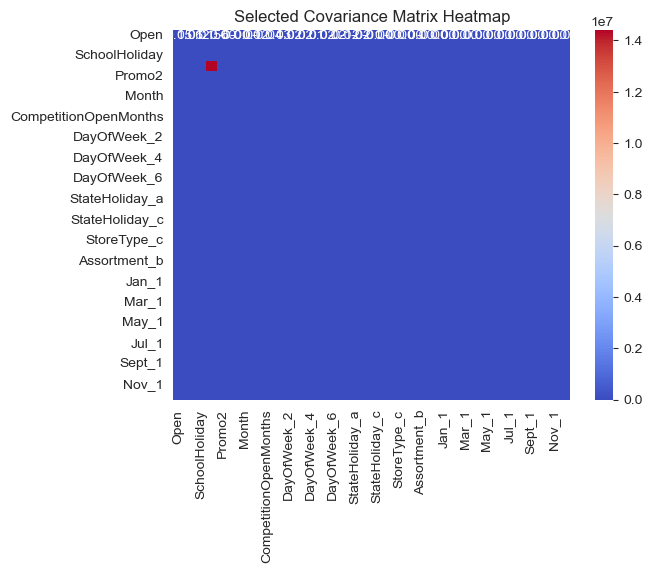

In [66]:
# get a cov-matrix of variables < 0.9
correlation_matrix = train_df_merged_dummies.corr()
target_correlations = correlation_matrix["Sales"].abs()
selected_features1 = target_correlations[target_correlations < 0.9].index
selected_cov_matrix = train_df_merged_dummies[selected_features1].cov()

# produce heatmap
sns.heatmap(selected_cov_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Selected Covariance Matrix Heatmap")
plt.show()

In [67]:
# show selected features
selected_features1

Index(['Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'Promo2',
       'Year', 'Month', 'Day', 'CompetitionOpenMonths', 'Promo2SinceWeeks',
       'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5',
       'DayOfWeek_6', 'DayOfWeek_7', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_b', 'Assortment_c', 'Jan_1', 'Feb_1', 'Mar_1', 'Apr_1',
       'May_1', 'Jun_1', 'Jul_1', 'Aug_1', 'Sept_1', 'Oct_1', 'Nov_1',
       'Dec_1'],
      dtype='object')

## Best Kset

In [68]:
# import Kbest
from sklearn.feature_selection import SelectKBest, f_regression

# perform feature selection
X = train_df_merged_dummies.drop(columns=["Sales"])
y = train_df_merged_dummies["Sales"]
selector = SelectKBest(score_func=f_regression, k=20)
X_selected = selector.fit_transform(X, y)

# selected feature index
selected_features2 = selector.get_support(indices=True)
selected_columns = X.columns[selected_features2]
print(f"Selected features: {selected_columns}")

Selected features: Index(['Customers', 'Open', 'Promo', 'SchoolHoliday', 'Promo2',
       'Promo2SinceWeeks', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_7', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'StoreType_d', 'Assortment_c', 'Mar_1', 'Jun_1',
       'Sept_1', 'Dec_1'],
      dtype='object')


## PCA

In [69]:
# import PCA
from sklearn.decomposition import PCA

# perform PCA
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)
features = X.columns

# get explained ratio
explained_variance = pca.explained_variance_ratio_ 

# get results as a dataframe with selected features and explanation rate
explained_variance_df = pd.DataFrame({ 
    'Feature': features[:len(explained_variance)],
    'Explained Variance Ratio': explained_variance }) 

# show result
print("Explained variance ratio:") 
print(explained_variance_df) 

Explained variance ratio:
                  Feature  Explained Variance Ratio
0               Customers              9.903069e-01
1                    Open              8.692032e-03
2                   Promo              8.094543e-04
3           SchoolHoliday              1.853016e-04
4     CompetitionDistance              5.294706e-06
5                  Promo2              7.595862e-07
6                    Year              5.558878e-08
7                   Month              3.847557e-08
8                     Day              3.034530e-08
9   CompetitionOpenMonths              1.804726e-08
10       Promo2SinceWeeks              1.675719e-08
11            DayOfWeek_2              1.303503e-08
12            DayOfWeek_3              1.197590e-08
13            DayOfWeek_4              1.029796e-08
14            DayOfWeek_5              9.895728e-09
15            DayOfWeek_6              9.864753e-09
16            DayOfWeek_7              9.795149e-09
17         StateHoliday_a             

## Selected features

In [70]:
# create a dataframe with selected features
final_selected_features = [
    'Sales',
    'Customers',
    'Open',
    'Promo',
    'SchoolHoliday',
    'Promo2',
    'Promo2SinceWeeks',
    'DayOfWeek_2',
    'DayOfWeek_3',
    'DayOfWeek_4',
    'DayOfWeek_5',
    'DayOfWeek_7',
    'StateHoliday_a',
    'StateHoliday_b',
    'StateHoliday_c',
    'StoreType_d',
    'Assortment_c',
    'Mar_1',
    'Jun_1',
    'Sept_1',
    'Dec_1'
]

# create a new dataframe with only selected features for training
train_df_selected = train_df_merged_dummies[final_selected_features]

# show result
train_df_selected

,Sales,Customers,Open,Promo,SchoolHoliday,Promo2,Promo2SinceWeeks,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,...,DayOfWeek_7,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_d,Assortment_c,Mar_1,Jun_1,Sept_1,Dec_1
0,5263,555,1,1,1,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6064,625,1,1,1,1,285,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8314,821,1,1,1,1,232,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,5651,589,1,1,1,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,8492,833,1,1,1,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,0,0,0,0,1,1,110,True,False,False,...,False,True,False,False,False,False,False,False,False,False
1017205,0,0,0,0,1,0,0,True,False,False,...,False,True,False,False,False,True,False,False,False,False
1017206,0,0,0,0,1,0,0,True,False,False,...,False,True,False,False,False,True,False,False,False,False
1017207,0,0,0,0,1,0,0,True,False,False,...,False,True,False,False,False,True,False,False,False,False


In [71]:
# create a new dataframe with only selected features for testing
test_df_selected = test_df_merged_dummies[final_selected_features]

# show result
test_df_selected

,Sales,Customers,Open,Promo,SchoolHoliday,Promo2,Promo2SinceWeeks,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,...,DayOfWeek_7,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_d,Assortment_c,Mar_1,Jun_1,Sept_1,Dec_1
0,NaN,609,1.0,1,0,0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,NaN,609,1.0,1,0,1,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,NaN,609,1.0,1,0,0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,NaN,609,1.0,1,0,0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,NaN,609,1.0,1,0,0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,NaN,609,1.0,0,0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41084,NaN,609,1.0,0,0,0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
41085,NaN,609,1.0,0,0,0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
41086,NaN,609,1.0,0,0,0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [72]:
# check datatypes in resulting training dataset
train_df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871191 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   Sales             871191 non-null  int64
 1   Customers         871191 non-null  int32
 2   Open              871191 non-null  int64
 3   Promo             871191 non-null  int64
 4   SchoolHoliday     871191 non-null  int64
 5   Promo2            871191 non-null  int64
 6   Promo2SinceWeeks  871191 non-null  int64
 7   DayOfWeek_2       871191 non-null  bool 
 8   DayOfWeek_3       871191 non-null  bool 
 9   DayOfWeek_4       871191 non-null  bool 
 10  DayOfWeek_5       871191 non-null  bool 
 11  DayOfWeek_7       871191 non-null  bool 
 12  StateHoliday_a    871191 non-null  bool 
 13  StateHoliday_b    871191 non-null  bool 
 14  StateHoliday_c    871191 non-null  bool 
 15  StoreType_d       871191 non-null  bool 
 16  Assortment_c      871191 non-null  bool 
 17  Mar_1         

# Regressions

## Lasso Regression

In [111]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# split data into predictors (X) and response (y)
X = train_df_merged_dummies.drop(columns=["Sales"]).values
y = train_df_merged_dummies["Sales"].values

# split date into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# import standard scaler
from sklearn.preprocessing import StandardScaler

# scale train and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
# import gridseach to find best hyper parameters
from sklearn.model_selection import GridSearchCV

# hyperparameter options
alphas = [1, 10, 100, 1000, 10000]

# create lasso model
lasso = Lasso(max_iter=50000)

# create GridSearchCV object
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# fit model
grid_search.fit(X_train_scaled, y_train)

# get best model
best_lasso = grid_search.best_estimator_

# predict on both train & test data 
y_train_pred = best_lasso.predict(X_train_scaled)
y_test_pred = best_lasso.predict(X_test_scaled)

# calculate RSS with given result
n = len(y_test)  # datapoint
RSS = np.sum((y_test - y_test_pred) ** 2)  # Residual Sum of Squares
k = len(best_lasso.coef_) + 1  # number of parameters

# calculate log_likelihood
log_likelihood = -0.5 * n * np.log(2 * np.pi) - 0.5 * n * np.log(RSS / n) - 0.5 * RSS

# RMSPE calculation
# convert test data and prediction result into numpy array
y_test1 = np.array(y_test)
y_test_pred1 = np.array(y_test_pred)

# remove zeros in the data to avoid division by zero
non_zero_indices = y_test1 != 0
y_test1 = y_test1[non_zero_indices]
y_test_pred1 = y_test_pred1[non_zero_indices]

# calculate RMSPE
rmspe = np.sqrt(np.mean(((y_test1 - y_test_pred1) / y_test1) ** 2))
print(f"RMSPE: {rmspe}")

# get other scores
print(f"AIC: {2 * k - 2 * log_likelihood}")
print(f"BIC: {np.log(n) * k - 2 * log_likelihood}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred)}")
print("Score(train): ", best_lasso.score(X_train_scaled, y_train))
print("Score(test): ", best_lasso.score(X_test_scaled, y_test))

# get best alpha value
print("Best alpha:", grid_search.best_params_)

# get prediction result
print(y_test_pred)

RMSPE: 0.1744608227605869
AIC: 201074730174.99686
BIC: 201074730557.58783
Mean Squared Error: 1154000.9854927056
Score(train):  0.8994881320499987
Score(test):  0.899925799244532
Best alpha: {'alpha': 1}
[8357.29894046 7019.62469719 -402.95347095 ... 5382.49930316 7981.30250261
 7657.20157919]


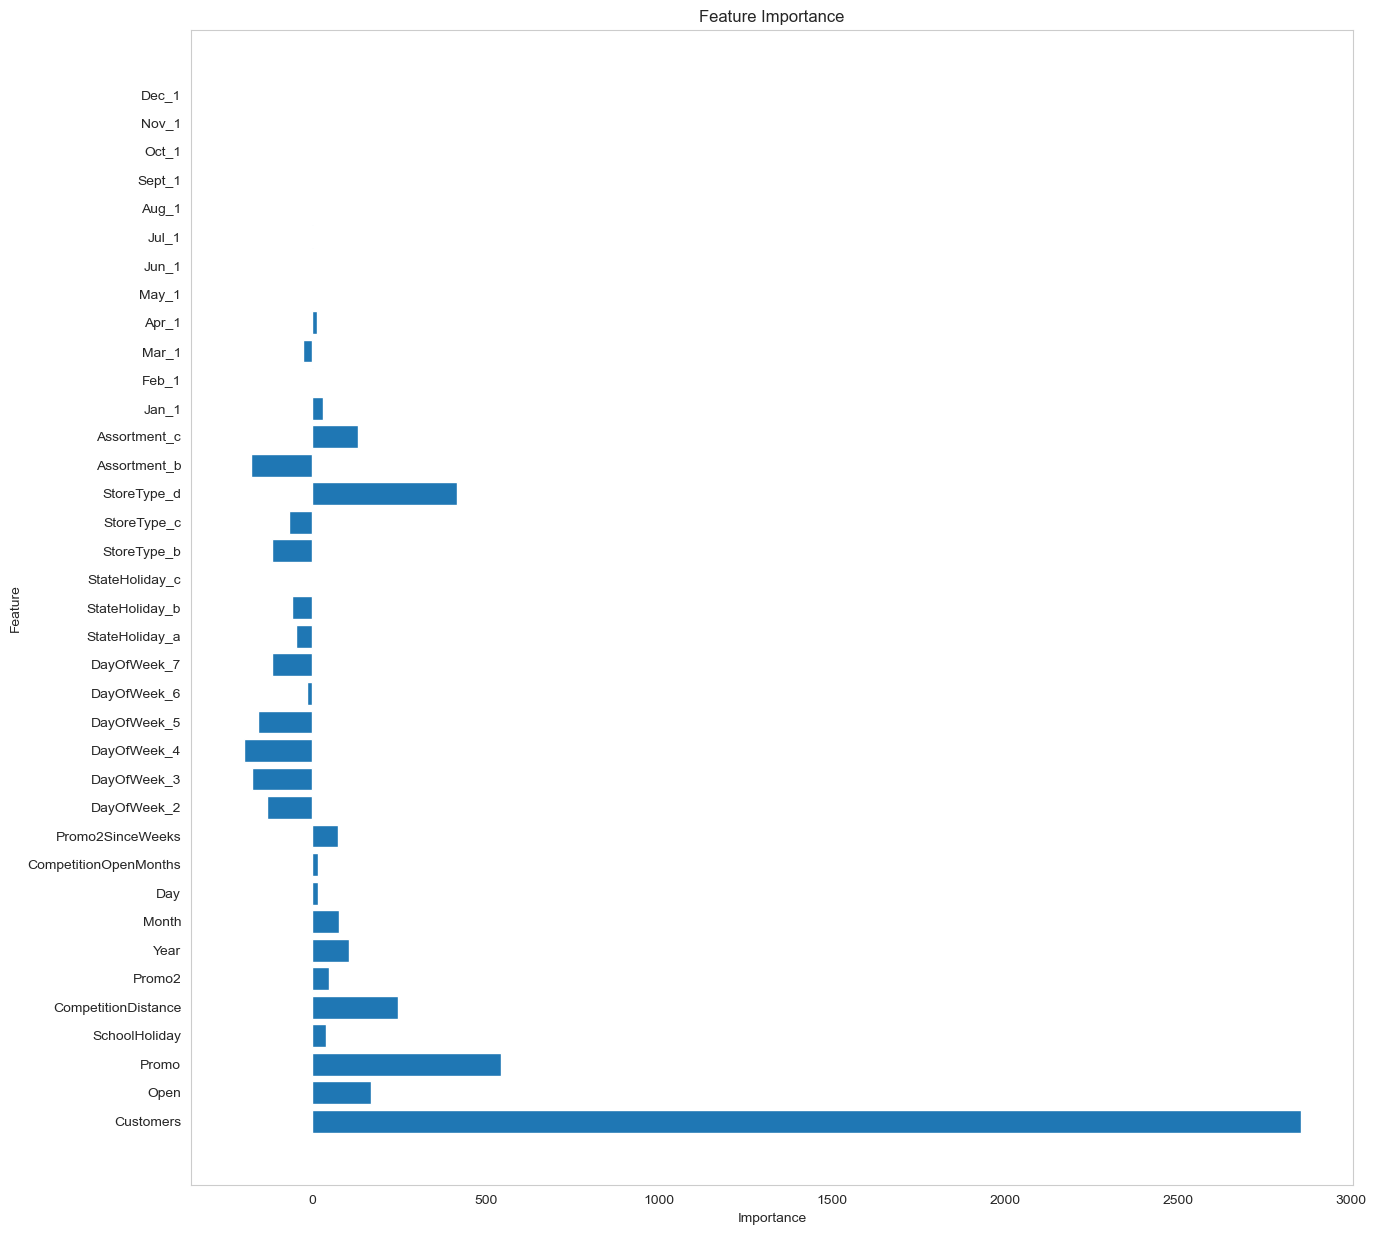

In [116]:
# get feature importance matrix
feature_importances = best_lasso.coef_
feature_names = train_df_merged_dummies.drop(columns=["Sales"]).columns

# show feature importance matrix
plt.figure(figsize=(15, 15))
plt.barh(feature_names, feature_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

## Ridge regression

In [118]:
# import required libraries for ridge regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# set hyperparameter options
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# create ridge model
ridge = Ridge(max_iter=10000)

# create GridSearchCV object
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# fit model
grid_search.fit(X_train_scaled, y_train)

# get best model
best_ridge = grid_search.best_estimator_

# predict on both train and test data
y_train_pred = best_ridge.predict(X_train_scaled)
y_test_pred = best_ridge.predict(X_test_scaled)

# calculate RSS with given result
n = len(y_test)  # datapoint
RSS = np.sum((y_test - y_test_pred) ** 2)  # Residual Sum of Squares
k = len(best_ridge.coef_) + 1  # number of parameters

# calculate log_likelihood
log_likelihood = -0.5 * n * np.log(2 * np.pi) - 0.5 * n * np.log(RSS / n) - 0.5 * RSS

# RMSPE calculation
# convert test data and prediction result into numpy array
y_test2 = np.array(y_test)
y_test_pred2 = np.array(y_test_pred)

# remove zeros in the data to avoid division by zero
non_zero_indices = y_test2 != 0
y_test2 = y_test2[non_zero_indices]
y_test_pred2 = y_test_pred2[non_zero_indices]

# Calculate RMSPE
rmspe = np.sqrt(np.mean(((y_test2 - y_test_pred2) / y_test2) ** 2))
print(f"RMSPE: {rmspe}")

# get other scores
print(f"AIC: {2 * k - 2 * log_likelihood}")
print(f"BIC: {np.log(n) * k - 2 * log_likelihood}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred)}")
print("Score(train): ", best_ridge.score(X_train_scaled, y_train))
print("Score(test): ", best_ridge.score(X_test_scaled, y_test))

# get best alpha value
print("Best alpha:", grid_search.best_params_)

# get prediction result
print(y_test_pred)

RMSPE: 0.17454950461702343
AIC: 201058530922.26215
BIC: 201058531304.85312
Mean Squared Error: 1153908.0141217918
Score(train):  0.8994939295346558
Score(test):  0.8999338616602095
Best alpha: {'alpha': 10}
[8358.39860846 7013.90378487 -406.35181021 ... 5383.04701087 7980.12477728
 7655.71201186]


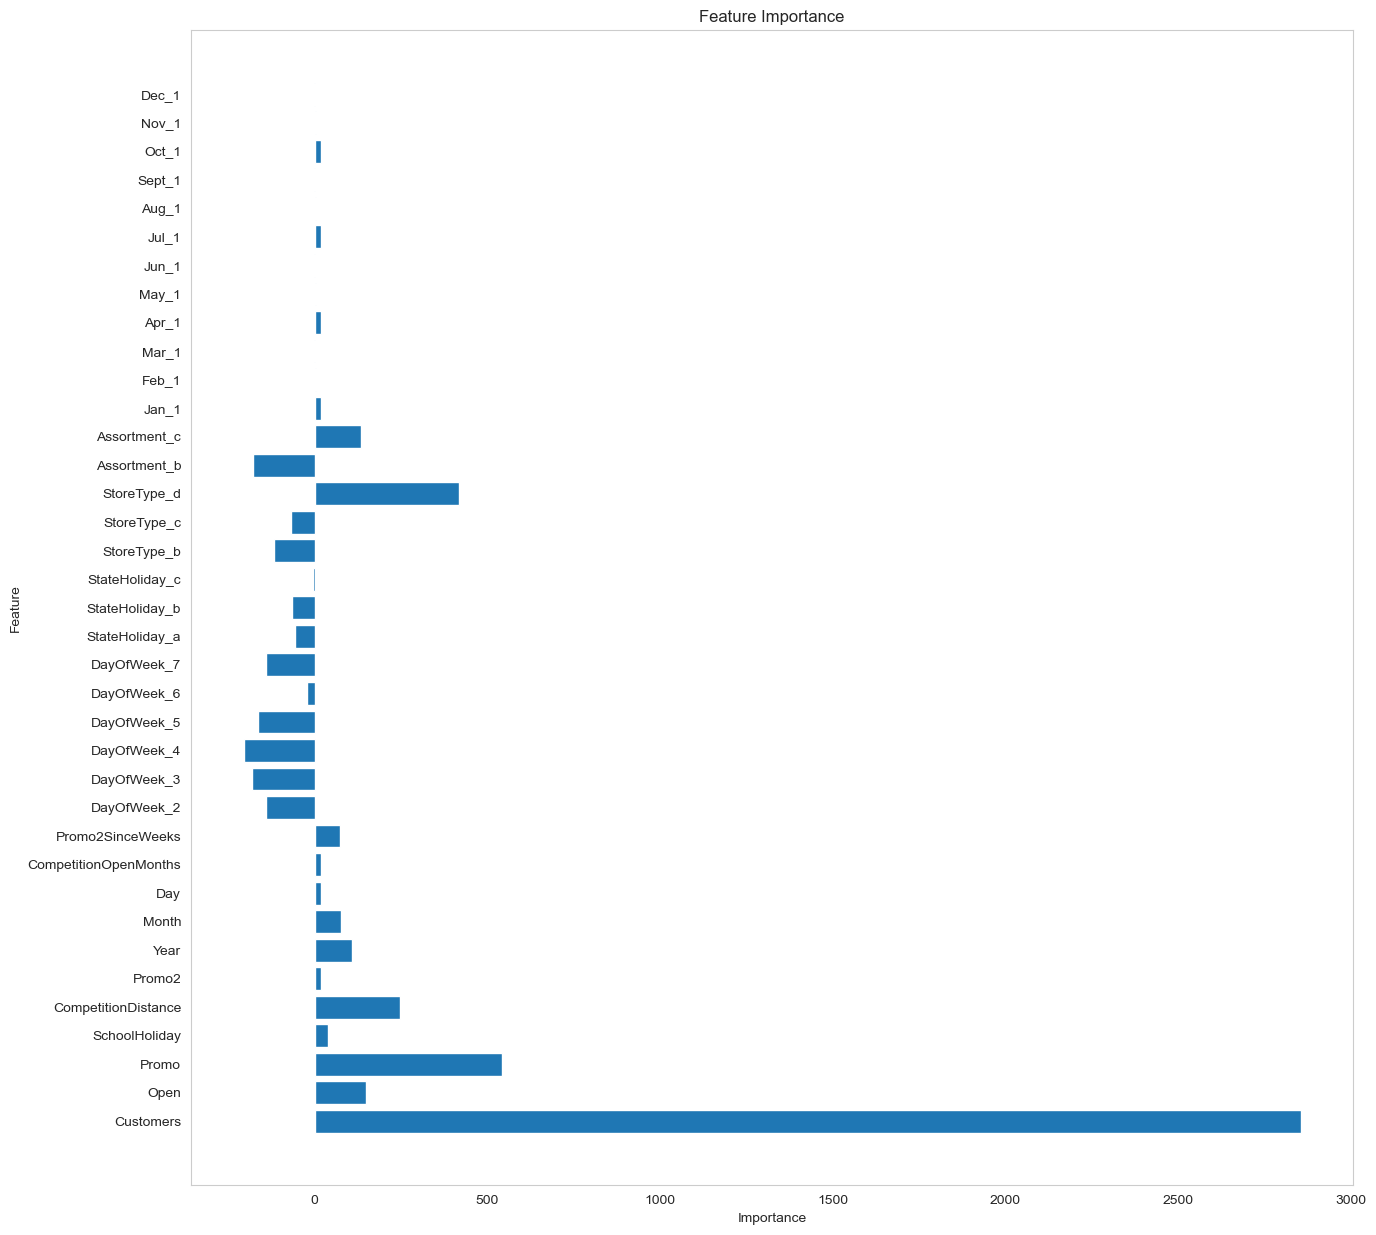

In [119]:
# get feature importance matrix
feature_importances = best_ridge.coef_
feature_names = train_df_merged_dummies.drop(columns=["Sales"]).columns

# show feature importance matrix
plt.figure(figsize=(15, 15))
plt.barh(feature_names, feature_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

### Multivariate Linear Regression

In [121]:
# import required libraries for multivariate linear regression
from sklearn.linear_model import LinearRegression

# split data into predictors (X) and response (y)
X = train_df_selected.drop(columns=["Sales"]).values
y = train_df_selected["Sales"].values

# split date into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# perform multivariate linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# calculate RSS with given result
n = len(y_test)  # datapoint
RSS = np.sum((y_test - y_pred_lr) ** 2)  # RSS
k = len(lr.coef_) + 1  # parameter

# calculate log_likelihood
log_likelihood = -0.5 * n * np.log(2 * np.pi) - 0.5 * n * np.log(RSS / n) - 0.5 * RSS

# RMSPE calculation
# convert test data and prediction result into numpy array
y_test3 = np.array(y_test)
y_test_pred3 = np.array(y_pred_lr)

# remove zeros in the data to avoid division by zero
non_zero_indices = y_test3 != 0
y_test3 = y_test3[non_zero_indices]
y_test_pred3 = y_test_pred3[non_zero_indices]

# Calculate RMSPE
rmspe = np.sqrt(np.mean(((y_test3 - y_test_pred3) / y_test3) ** 2))
print(f"RMSPE: {rmspe}")

# get other scores
print(f"AIC: {2 * k - 2 * log_likelihood}")
print(f"BIC: {np.log(n) * k - 2 * log_likelihood}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr)}")
print("Score(train): ", lr.score(X_train, y_train))
print("Score(test): ", lr.score(X_test, y_test))

# get prediction result
print(y_pred_lr)

RMSPE: 0.1929890241491913
AIC: 225907563710.3546
BIC: 225907563921.78647
Mean Squared Error: 1296522.5408224887
Score(train):  0.8869437059734493
Score(test):  0.8875664244091935
[8164.6173235  7185.10110588 -189.46007357 ... 5251.0454858  7978.07338122
 7439.50522442]


## Random Forest

In [123]:
# import required libraries for random forest regression
from sklearn.ensemble import RandomForestRegressor

# model initialization
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# predict
y_pred_rf = model.predict(X_test)

# calculate RSS with given result
n = len(y_test)  # datapoint
RSS = np.sum((y_test - y_pred_rf) ** 2)  # RSS
k = len(model.feature_importances_) + 1  # parameter

# calculate log_likelihood
log_likelihood = -0.5 * n * np.log(2 * np.pi) - 0.5 * n * np.log(RSS / n) - 0.5 * RSS

# RMSPE calculation
# convert test data and prediction result into numpy array
y_test4 = np.array(y_test)
y_test_pred4 = np.array(y_pred_rf)

# remove zeros in the data to avoid division by zero
non_zero_indices = y_test4 != 0
y_test4 = y_test4[non_zero_indices]
y_test_pred4 = y_test_pred4[non_zero_indices]

# Calculate RMSPE
rmspe = np.sqrt(np.mean(((y_test4 - y_test_pred4) / y_test4) ** 2))
print(f"RMSPE: {rmspe}")

# get other scores
print(f"AIC: {2 * k - 2 * log_likelihood}")
print(f"BIC: {np.log(n) * k - 2 * log_likelihood}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")
print("Score(train): ", model.score(X_train, y_train))
print("Score(test): ", model.score(X_test, y_test))

# get prediction result
print(y_pred_rf)

RMSPE: 0.16172612817876256
AIC: 172249711269.66455
BIC: 172249711481.0964
Mean Squared Error: 988567.3460048955
Score(train):  0.9587764209114789
Score(test):  0.9142720948352089
[8452.20030952 5917.41904762    0.         ... 4697.84133333 7026.47
 9022.92833333]


# Evaluation

## Model evaluation

In [132]:
# create a dataframe for model evaluation
evaluation = pd.DataFrame()

# input RMSPE of each model
evaluation.loc['LASSO Regression', 'RMSPE'] = np.sqrt(np.mean(((y_test1 - y_test_pred1) / y_test1) ** 2))
evaluation.loc['Ridge Regression', 'RMSPE'] = np.sqrt(np.mean(((y_test2 - y_test_pred2) / y_test2) ** 2))
evaluation.loc['Multivariate Regression', 'RMSPE'] = np.sqrt(np.mean(((y_test3 - y_test_pred3) / y_test3) ** 2))
evaluation.loc['Random Forest', 'RMSPE'] = np.sqrt(np.mean(((y_test4 - y_test_pred4) / y_test4) ** 2))

# show result
evaluation

,RMSPE
LASSO Regression,0.174461
Ridge Regression,0.174550
Multivariate Regression,0.192989
Random Forest,0.161726


In [179]:
test_df_merged_dummies

,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,Day,...,Mar_1,Apr_1,May_1,Jun_1,Jul_1,Aug_1,Sept_1,Oct_1,Nov_1,Dec_1
0,NaN,609,1.0,1,0,1270.0,0,2015,9,17,...,False,False,False,False,False,False,False,False,False,False
1,NaN,609,1.0,1,0,14130.0,1,2015,9,17,...,False,True,False,False,True,False,False,True,False,False
2,NaN,609,1.0,1,0,24000.0,0,2015,9,17,...,False,False,False,False,False,False,False,False,False,False
3,NaN,609,1.0,1,0,7520.0,0,2015,9,17,...,False,False,False,False,False,False,False,False,False,False
4,NaN,609,1.0,1,0,2030.0,0,2015,9,17,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,NaN,609,1.0,0,0,1900.0,1,2015,8,1,...,False,True,False,False,True,False,False,True,False,False
41084,NaN,609,1.0,0,0,1880.0,0,2015,8,1,...,False,False,False,False,False,False,False,False,False,False
41085,NaN,609,1.0,0,0,9260.0,0,2015,8,1,...,False,False,False,False,False,False,False,False,False,False
41086,NaN,609,1.0,0,0,870.0,0,2015,8,1,...,False,False,False,False,False,False,False,False,False,False


## Check model with testing dataset

In [246]:
# get predictors (X) from testing dataset
X = test_df_merged_dummies.drop(columns=["Sales"]).values

# standard-scale X
X_testdata_scaled = scaler.fit_transform(X)

# get variance of testing data (X)
variances = np.var(X_train_scaled, axis=0)

# only get data with variance > 0
non_zero_variance_indices = variances > 0
X_train_scaled = X_train_scaled[:, non_zero_variance_indices]
X_testdata_scaled = X_testdata_scaled[:, non_zero_variance_indices]

In [248]:
# NaN check
print("NaN count:", np.isnan(X_testdata_scaled).sum())

NaN count: 11


In [250]:
# convert scaled data into a dataframe and drop NaN values
X_testdata_scaled_df = pd.DataFrame(X_testdata_scaled)  
X_testdata_scaled_df = X_testdata_scaled_df.dropna() 
X_testdata_scaled = X_testdata_scaled_df.values 

print("Shape after removing NaN rows:", X_testdata_scaled.shape)

Shape after removing NaN rows: (41077, 37)


In [252]:
# predict on the testing data with the lasso model
X_testdata_pred = best_lasso.predict(X_testdata_scaled)

# show result
X_testdata_pred

array([5179.31821517, 6038.53852877, 6444.62754889, ..., 5150.62484566,
       4863.41121705, 5980.92847099])

In [254]:
# get basic stats of prediction result
df_pred = pd.DataFrame(X_testdata_pred, columns=["Predictions"])
df_pred.describe()

,Predictions
count,41077.000000
mean,5409.611967
std,931.076637
min,1174.124117
25%,4717.127301
50%,5465.024696
75%,5985.629049
max,8776.150912


In [256]:
# get basic stats of real data
df_traindataset = train_df_selected["Sales"]
df_traindataset.describe()

count    871191.000000
mean       5406.876586
std        3390.520259
min           0.000000
25%        3609.000000
50%        5586.000000
75%        7542.000000
max       33071.000000
Name: Sales, dtype: float64

#EOF